# 2.2 SOO for 1D scalars

In [6]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

/home/dharrington/cyclops/src


We instantiate the objects we need (change the temperature field to a different field if you have saved your field with a different name in steps 1 and 2). We also set some bounds for the sensors to go in.

In [7]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'temp_line_field.obj')
grid = pickle_manager.read_file('simulation', 'temp_line_points.obj')

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds+np.array([[1], [-1]])*0.002

description

In [8]:
# Setup the symmetry
symmetry_manager = SymmetryManager()
symmetry_manager.set_1D_x(0.01)

# Setup the sensor suite
temps = pickle_manager.read_file('sensors', 'k-type-T.obj')
voltages = pickle_manager.read_file('sensors', 'k-type-V.obj')
sensor = Thermocouple(temps, voltages, 1)
sensors = np.array([sensor]*5)

# def f(x): return np.zeros(x.shape)
# sensor = PointSensor(0, f, 0.1, np.array([[-5e10], [5e10]]), 1)
# sensors = np.array([sensor]*5)


# def f(x): return np.zeros(x.shape)
# sensor_1 = MultiSensor(0, f, 0.1, np.array([[-5000], [5000]]), np.linspace(sensor_bounds[0, 0], sensor_bounds[1, 0], 10).reshape(-1, 1))
# sensors = np.array([sensor_1, sensor, sensor, sensor])

sensor_suite = SensorSuite(
    ScalarField(CSModel, field_bounds), 
    sensors
)

description

In [9]:
# Setup the experiment
optimiser = PSOOptimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_soo(
    sensor_suite,
    sensor_bounds
)
res = experiment.design()
proposed_layout, true_temps, model_temps, sensor_values = experiment.get_SOO_plotting_arrays(res.X)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       30 |        - |       - |  0.9000 |  2.00000 |  2.00000 |  7.469262E+03 |  5.0058813587
     2 |       60 |  0.02145 |       3 |  0.4135 |  2.00000 |  2.01753 |  2.179432E+02 |  5.0058813587
     3 |       90 | -1.2E-02 |       3 |  0.3923 |  1.99144 |  2.03224 |  6.495757E+01 |  2.1788513005
     4 |      120 | -1.1E-02 |       3 |  0.3934 |  1.97998 |  2.03897 |  4.851817E+01 |  1.6960537314
     5 |      150 | -2.4E-02 |       3 |  0.3853 |  1.97106 |  2.04780 |  2.041239E+01 |  1.2744466119
     6 |      180 |  0.03950 |       3 |  0.4249 |  1.96273 |  2.06637 |  1.959049E+01 |  1.0523471366
     7 |      210 | -6.8E-03 |       3 |  0.3958 |  1.94976 |  2.08116 |  1.700156E+01 |  1.0523471366
     8 |      240 | -1.7E-02 |       3 |  0.3895 |  1.93573 |  2.08624 |  5.9900697809 |  1.0523471366
     9 |      270 | -1.6E-02 |       3 |  0.3901 |  1.92645 |  2.09638 | 

description

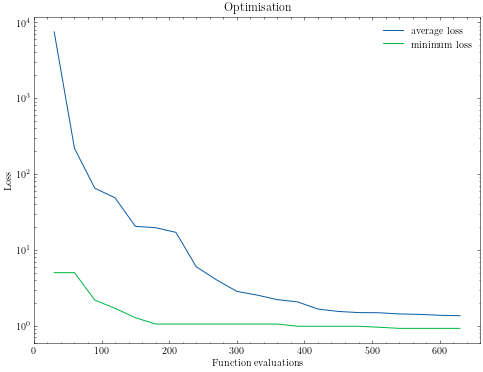

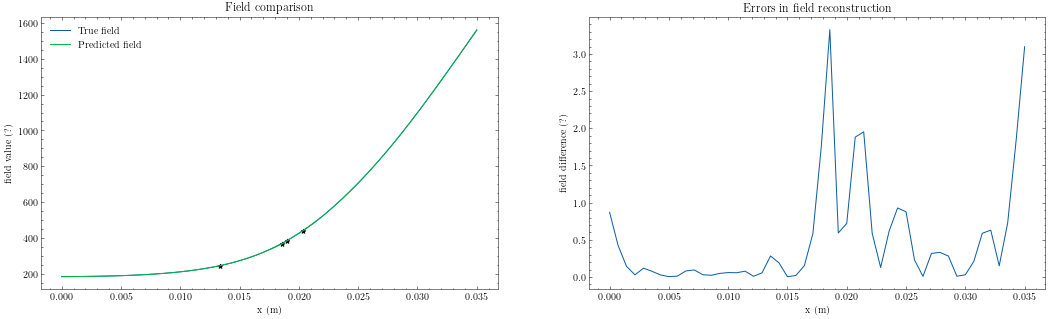

In [10]:
# Display the results
graph_manager.build_optimisation(
    res.history
)
graph_manager.draw()
graph_manager.build_1D_compare(
    grid,
    proposed_layout,
    sensor_values,
    true_temps,
    model_temps
)
graph_manager.draw()